## Import Libraries

In [5]:
import pandas as pd
import os

## Loading Data

In [17]:
images_df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/images.csv")

In [18]:
styles_df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

In [19]:
images_df['id'] = images_df['filename'].apply(lambda x: x.replace(".jpg","")).astype(int)

## Merging images filepath in styles data

In [20]:
data = styles_df.merge(images_df, on='id', how='left').reset_index(drop=True)
data['filename'] = data['filename'].apply(lambda x: os.path.join("../input/fashion-product-images-dataset/fashion-dataset/images/",x))

In [22]:
image_files = os.listdir("../input/fashion-product-images-dataset/fashion-dataset/images")

In [23]:
data['file_found'] = data['id'].apply(lambda x: f"{x}.jpg" in image_files)

In [25]:
data = data[data['file_found']].reset_index(drop=True)

In [26]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,file_found
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True


## Preprocessing data

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44419 entries, 0 to 44418
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44419 non-null  int64  
 1   gender              44419 non-null  object 
 2   masterCategory      44419 non-null  object 
 3   subCategory         44419 non-null  object 
 4   articleType         44419 non-null  object 
 5   baseColour          44404 non-null  object 
 6   season              44398 non-null  object 
 7   year                44418 non-null  float64
 8   usage               44102 non-null  object 
 9   productDisplayName  44412 non-null  object 
 10  filename            44419 non-null  object 
 11  link                44419 non-null  object 
 12  file_found          44419 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [31]:
data.describe()

,id,year
count,44419.000000,44418.000000
mean,29695.850177,2012.806430
std,17050.002202,2.126489
min,1163.000000,2007.000000
25%,14768.500000,2011.000000
50%,28617.000000,2012.000000
75%,44685.000000,2015.000000
max,60000.000000,2019.000000


In [33]:
data.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
filename                0
link                    0
file_found              0
dtype: int64

In [34]:
data = data.dropna()

In [35]:
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")

Rows: 44072, Columns: 13


In [36]:
# Print unique values in each column
for column in data.columns:
    print(f"Unique values in '{column}':")
    print(data[column].unique())
    print("\n")

Unique values in 'id':
[15970 39386 59263 ... 18842 46694 51623]


Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']


Unique values in 'masterCategory':
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']


Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


Unique values in 'articleType':
['Shirts' 'Jeans' 'Watches' 'Track Pants' 'Tshirts' 'Socks' 'Casual Shoes'
 'Belts' 'Flip Flops' 'Handbags' 'Tops' 'Bra' 'Sandals' 'S

## Exploratory data analysis

Unique values in 'gender':
['Men' 'Women' 'Boys' 'Girls' 'Unisex']




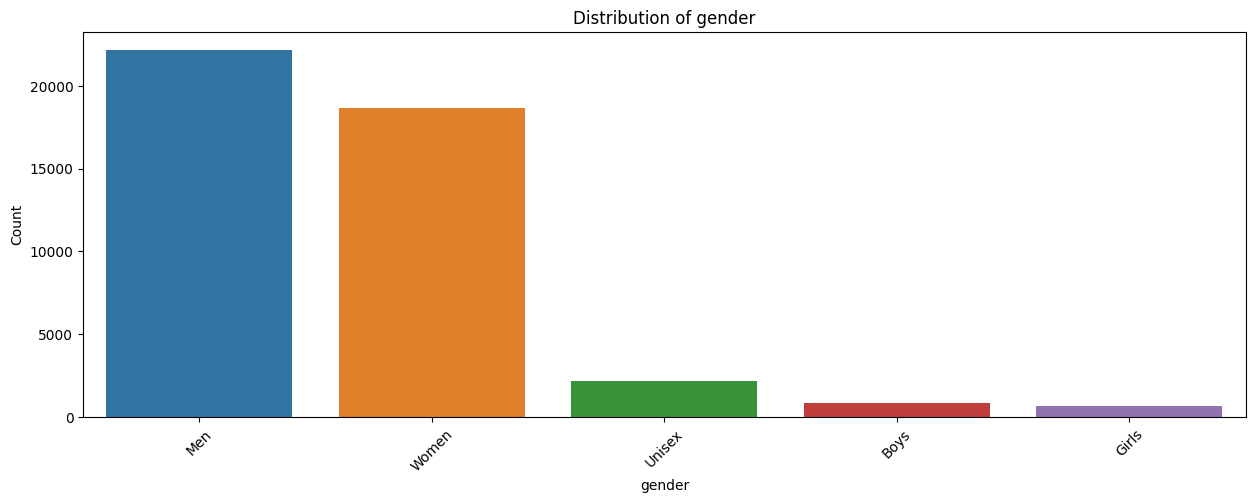

Unique values in 'masterCategory':
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']




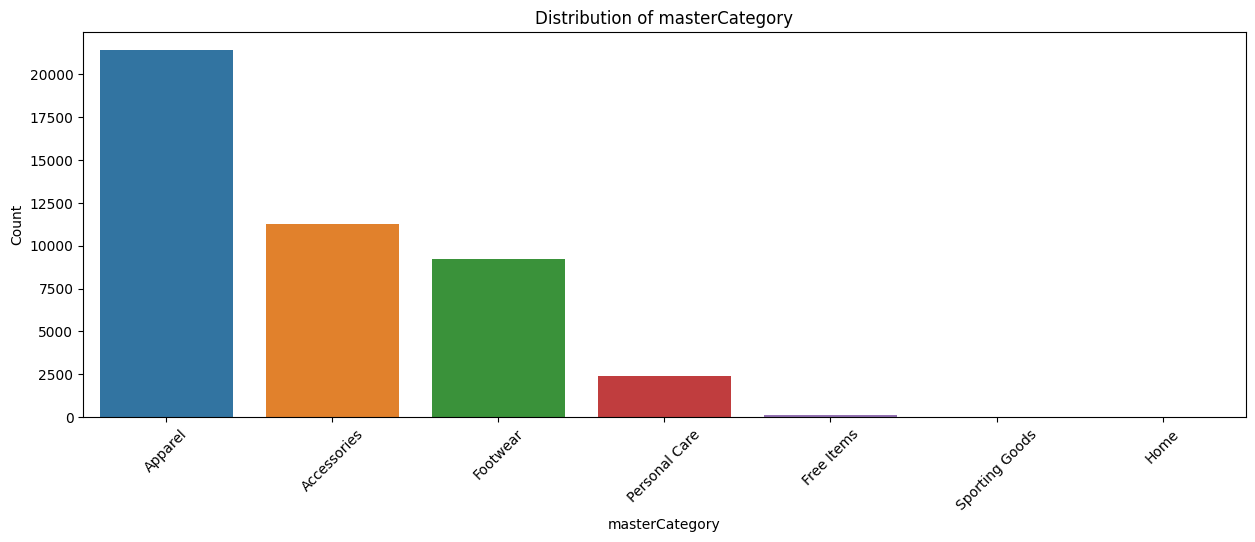

Unique values in 'subCategory':
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Scarves' 'Dress' 'Loungewear and Nightwear'
 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers' 'Skin Care' 'Makeup'
 'Free Gifts' 'Ties' 'Accessories' 'Nails' 'Beauty Accessories'
 'Water Bottle' 'Skin' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']




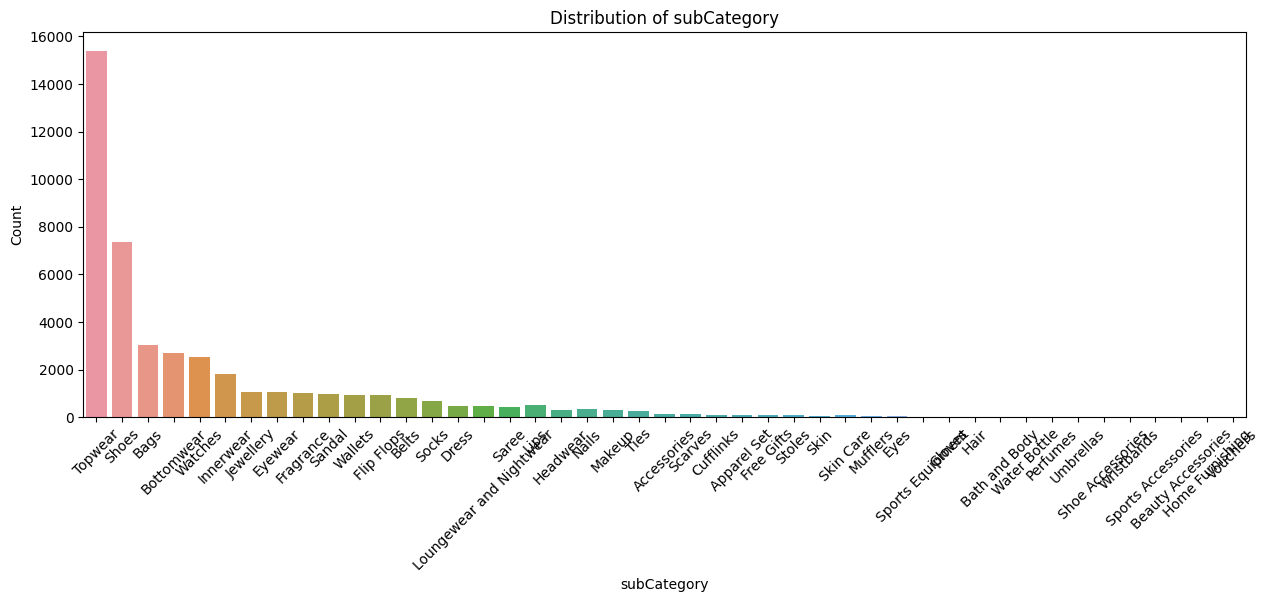

Unique values in 'baseColour':
['Navy Blue' 'Blue' 'Silver' 'Black' 'Grey' 'Green' 'Purple' 'White'
 'Beige' 'Brown' 'Bronze' 'Teal' 'Copper' 'Pink' 'Off White' 'Maroon'
 'Red' 'Khaki' 'Orange' 'Yellow' 'Charcoal' 'Gold' 'Steel' 'Tan' 'Multi'
 'Magenta' 'Lavender' 'Sea Green' 'Cream' 'Peach' 'Olive' 'Skin'
 'Burgundy' 'Coffee Brown' 'Grey Melange' 'Rust' 'Rose' 'Lime Green'
 'Mauve' 'Turquoise Blue' 'Metallic' 'Mustard' 'Taupe' 'Nude'
 'Mushroom Brown' 'Fluorescent Green']




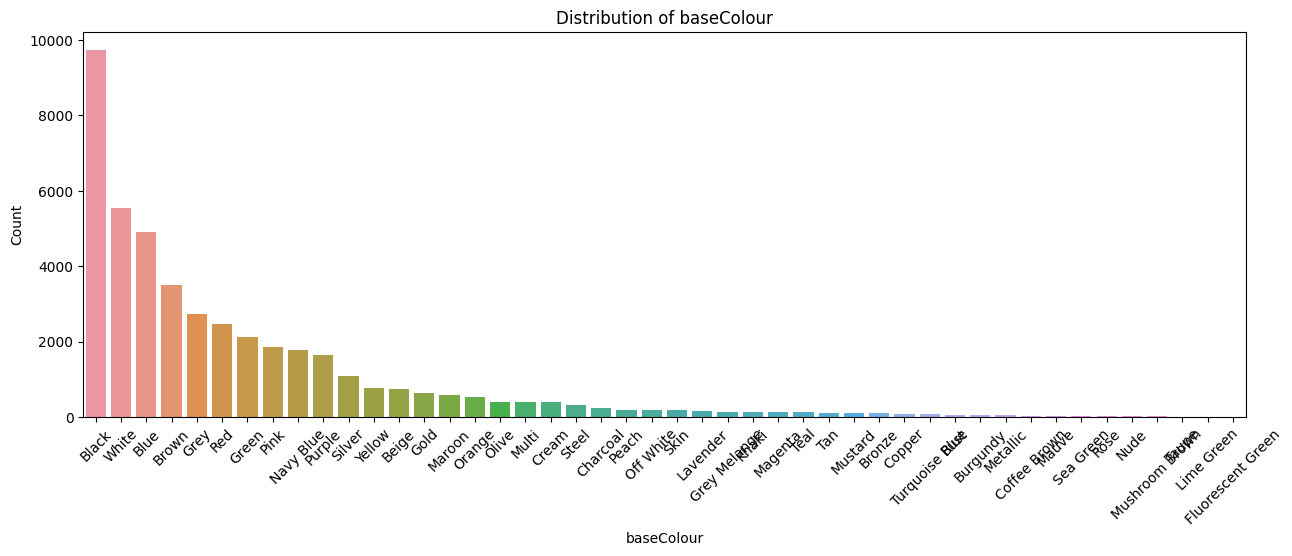

Unique values in 'season':
['Fall' 'Summer' 'Winter' 'Spring']




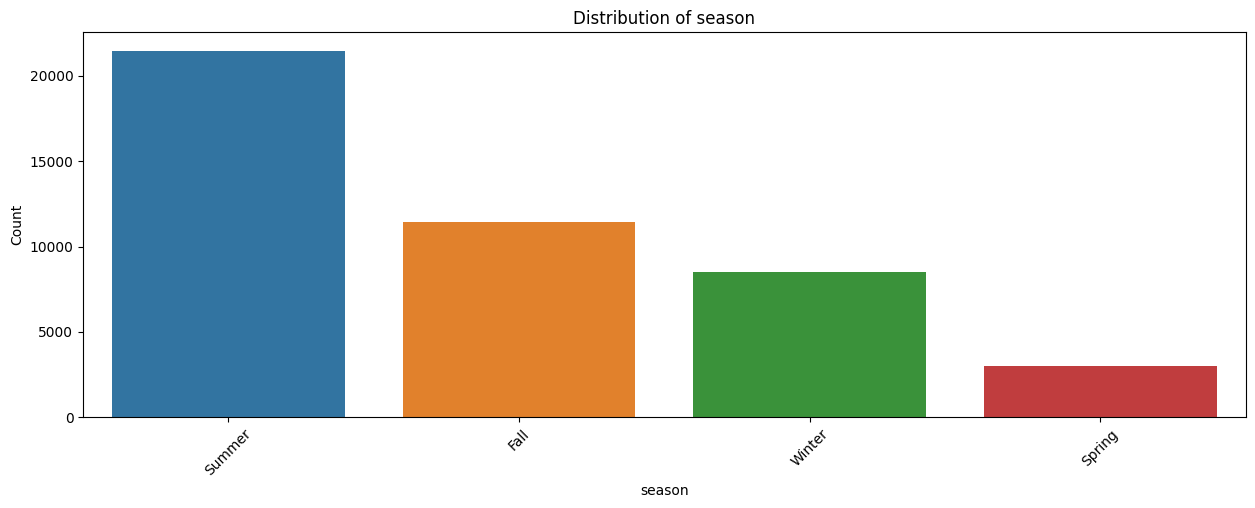

Unique values in 'usage':
['Casual' 'Ethnic' 'Formal' 'Sports' 'Smart Casual' 'Travel' 'Party'
 'Home']




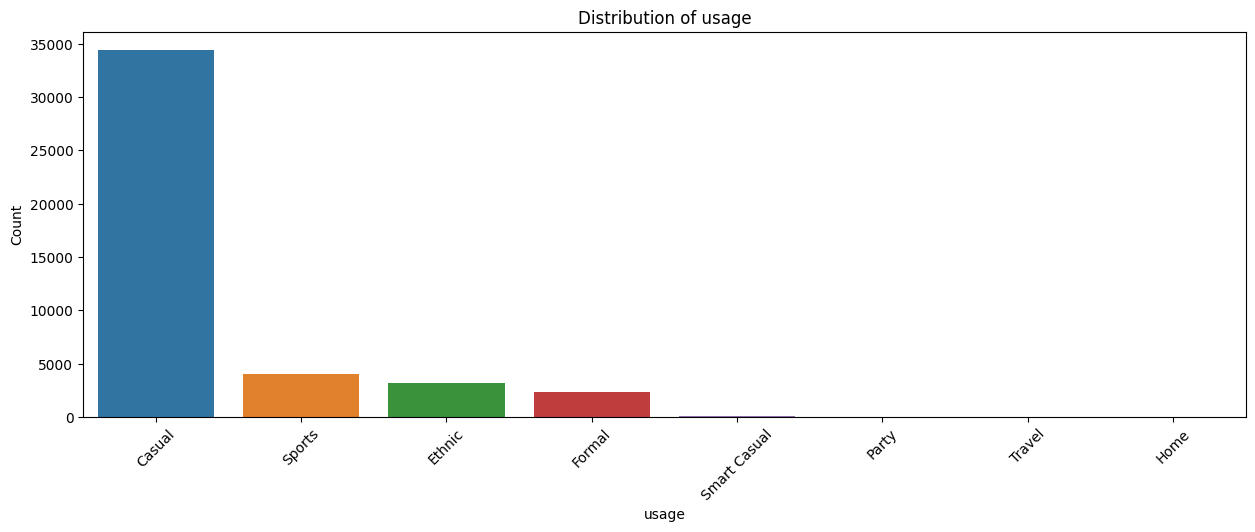

Unique values in 'year':
[2011. 2012. 2016. 2017. 2015. 2014. 2010. 2013. 2018. 2019. 2007. 2009.
 2008.]




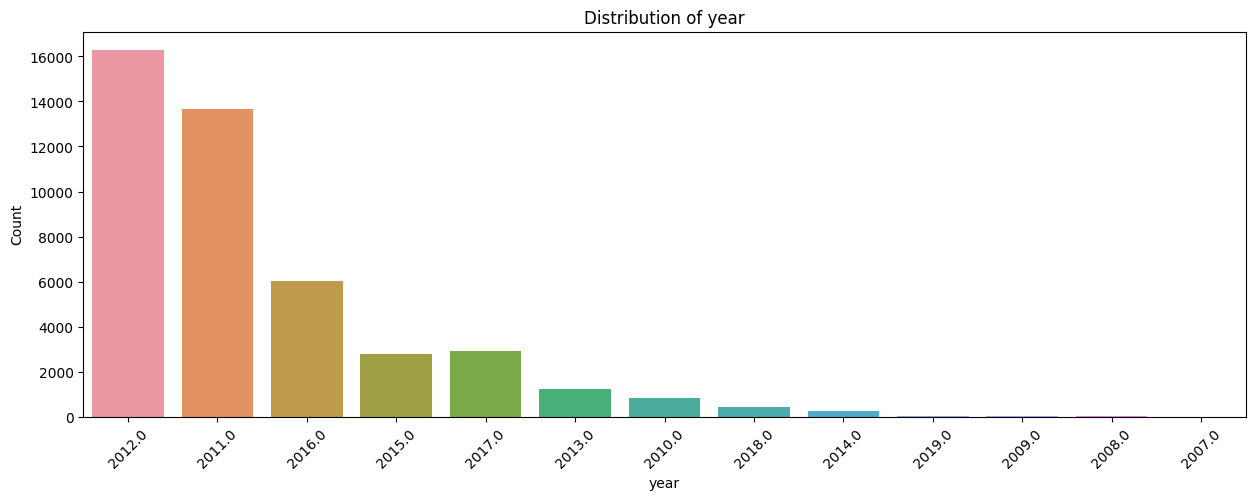

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['gender','masterCategory','subCategory','baseColour','season','usage','year']

for column in columns:

        print(f"Unique values in '{column}':")
        print(data[column].unique())
        print("\n")
        # Visualize the distribution for categorical columns
        plt.figure(figsize=(15, 5))
        sns.countplot(data=styles_df, x=column, order=data[column].value_counts().index)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)  # Rotate x labels if needed
        plt.ylabel('Count')
        plt.show()

In [39]:
image_filenames = list(data['filename'])

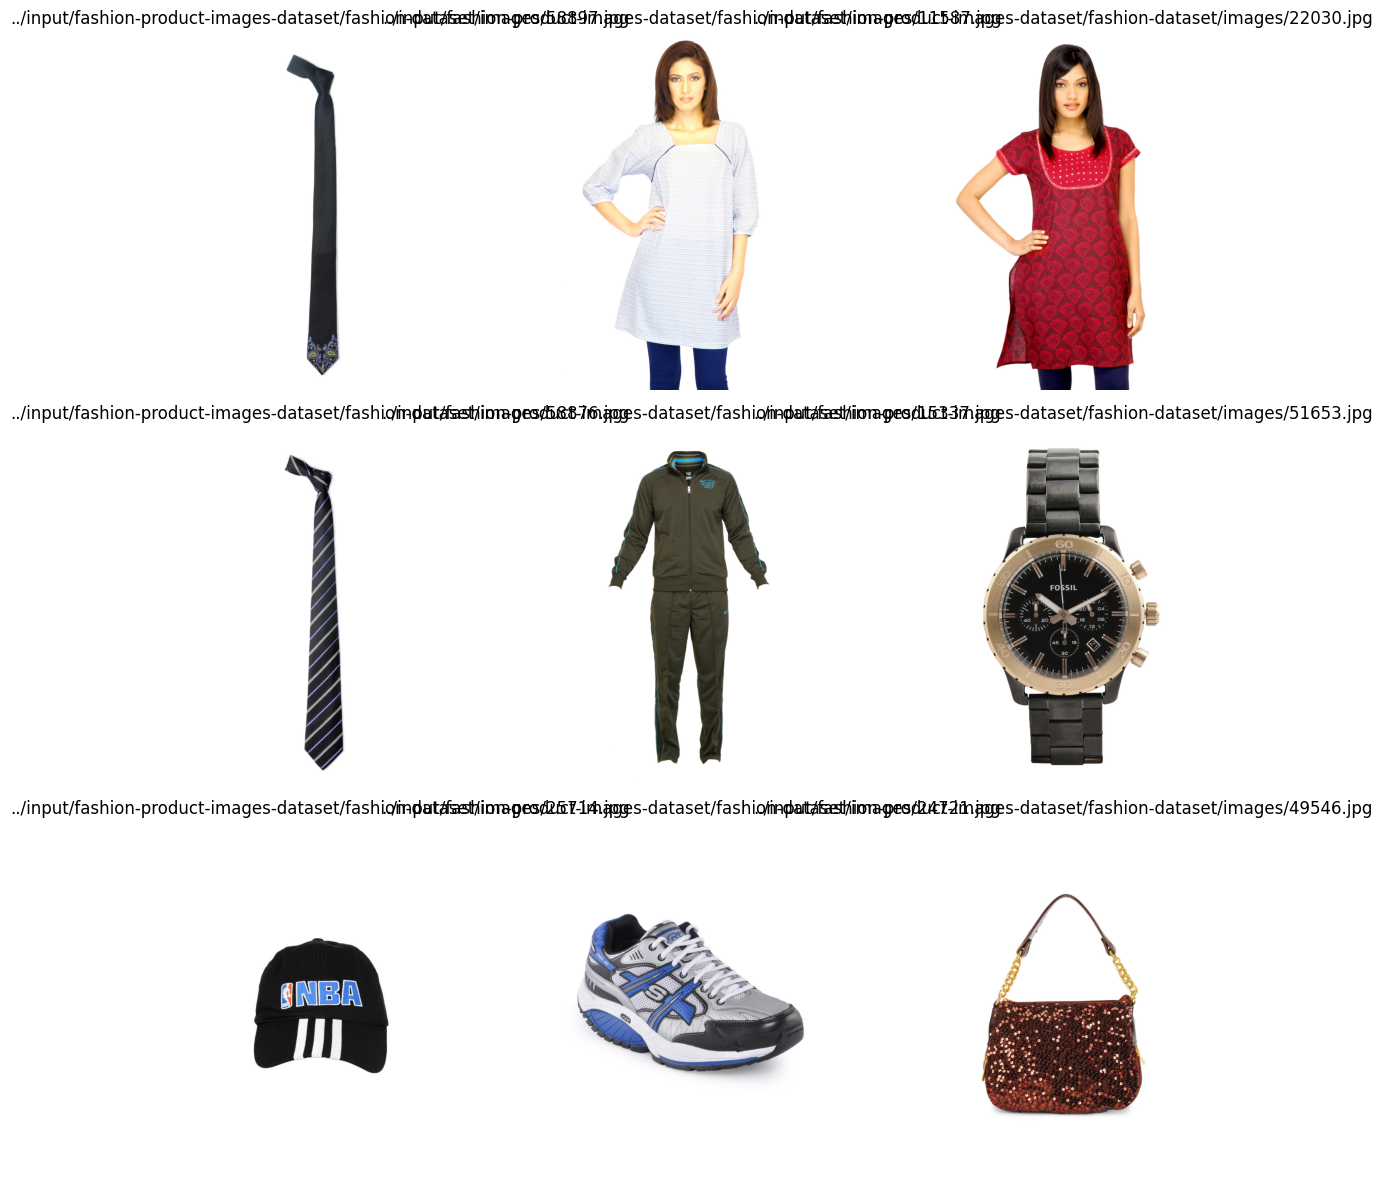

In [40]:
import random
import cv2

# Check the number of available images
num_images = len(image_filenames)
if num_images < 9:
    print(f"Only {num_images} images found. Selecting all available images.")
    selected_images = image_filenames  # Select all available images
else:
    # Randomly select 9 images
    selected_images = random.sample(image_filenames, 9)

# Set up the plot
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

# Loop through the selected images and plot them
for ax, img_filename in zip(axes, selected_images):
    # Load the image
    # img_path = os.path.join(image_dir, img_filename)
    img = cv2.imread(img_filename)
    
    # Check if the image was loaded properly
    if img is None:
        print(f"Image {img_filename} could not be loaded.")
        ax.axis('off')  # Hide the axes for this subplot
        ax.set_title(f"Failed to load")
        continue  # Skip this image

    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    ax.imshow(img)
    ax.set_title(img_filename)
    ax.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()

## Preprocessing Images
### (Resizing and converting to array)

In [41]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Flatten)
from tensorflow.keras.layers import (Dense, Lambda, Dropout, Activation)
from tensorflow import keras
from tensorflow.keras.layers import (Conv2D, MaxPooling2D)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

In [42]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(60, 60, 3))
    image = img_to_array(image)
    image = preprocess_input(image)
    return image

In [15]:
product_images = []
counter = 0
for file_path in data['filename']:
    if counter % 1000 == 0:
        print(f"Image {counter} done!")
    product_images.append(preprocess_image(file_path))
    counter += 1

Image 0 done!
Image 1000 done!
Image 2000 done!
Image 3000 done!
Image 4000 done!
Image 5000 done!
Image 6000 done!
Image 7000 done!
Image 8000 done!
Image 9000 done!
Image 10000 done!
Image 11000 done!
Image 12000 done!
Image 13000 done!
Image 14000 done!
Image 15000 done!
Image 16000 done!
Image 17000 done!
Image 18000 done!
Image 19000 done!
Image 20000 done!
Image 21000 done!
Image 22000 done!
Image 23000 done!
Image 24000 done!
Image 25000 done!
Image 26000 done!
Image 27000 done!
Image 28000 done!
Image 29000 done!
Image 30000 done!
Image 31000 done!
Image 32000 done!
Image 33000 done!
Image 34000 done!
Image 35000 done!
Image 36000 done!
Image 37000 done!
Image 38000 done!
Image 39000 done!
Image 40000 done!
Image 41000 done!
Image 42000 done!
Image 43000 done!
Image 44000 done!


In [16]:
# Saving Images features in form of Arrays
import numpy as np

product_images = np.array(product_images)
np.save("image-features.npy", product_images)

In [17]:
# Loading the Array
product_images = np.load("image-features.npy")

In [18]:
product_images.shape

(44072, 60, 60, 3)

## Converting the Categorical variables to integer lables

In [43]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np

In [44]:
gender_lb = LabelBinarizer()
article_type_lb = LabelBinarizer()
color_lb = LabelBinarizer()
season_lb = LabelBinarizer()

gender_labels = gender_lb.fit_transform(np.array(data['gender'].values))
article_type_labels = article_type_lb.fit_transform(np.array(data['articleType'].values))
color_labels = color_lb.fit_transform(np.array(data['baseColour'].values))
season_labels = season_lb.fit_transform(np.array(data['season'].values))


## Splitting the data into Train and Test

In [21]:
(X_train, X_test, 
 y_gender_train, y_gender_test, 
 y_article_type_train, y_article_type_test,
 y_color_train, y_color_test,
 y_season_train, y_season_test,
) = train_test_split(
    product_images, gender_labels, 
    article_type_labels, color_labels,
    season_labels,
    test_size=0.2, random_state=42
)

## Building Neural Network Architecture

In [22]:
def make_branch(res_input, n_out, act_type, name):
    z = Dense(512, activation="relu")(res_input)
    z = Dense(256, activation='relu')(z)
    z = Dense(128, activation='relu')(z)
    z = BatchNormalization()(z)
    z = Dropout(0.2)(z)
    z = Dense(n_out)(z)
    z = Activation(act_type, name=(name + '_output'))(z)
    return z

## Using Pretrained ResNet50

In [23]:
def create_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(60, 60, 3))
    base_model.trainable = False
    input_layer = Input(shape=(60, 60, 3))
    x = base_model(input_layer, training=False)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    
    gender_branch = make_branch(x, len(gender_lb.classes_), 'softmax', 'gender')
    article_type_branch = make_branch(x, len(article_type_lb.classes_), 'softmax', 'article_type')
    color_branch = make_branch(x, len(color_lb.classes_), 'softmax', 'color')
    season_branch = make_branch(x, len(season_lb.classes_), 'softmax', 'season')
    
    model = Model(inputs=input_layer, outputs=[
        gender_branch, article_type_branch, color_branch,
        season_branch
    ])
    
    return model

In [24]:
model = create_model()

94765736/94765736 [==============================] - 0s 0us/step


In [43]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 60, 60, 3)]          0         []                            
                                                                                                  
 resnet50 (Functional)       (None, 2, 2, 2048)           2358771   ['input_2[0][0]']             
                                                          2                                       
                                                                                                  
 flatten (Flatten)           (None, 8192)                 0         ['resnet50[0][0]']            
                                                                                                  
 dense (Dense)               (None, 1024)                 8389632   ['flatten[0][0]']         

In [25]:
loss_functions = {
    'gender_output': 'categorical_crossentropy',
    'article_type_output': 'categorical_crossentropy', 
    'color_output': 'categorical_crossentropy', 
    'season_output': 'categorical_crossentropy',  
}

EPOCH = 25
INIT_LR = 1e-4
BATCH = 32

opt = Adam(lr=INIT_LR)
model.compile(optimizer=opt, loss=loss_functions, metrics=["accuracy"])

## Architecture Diagram

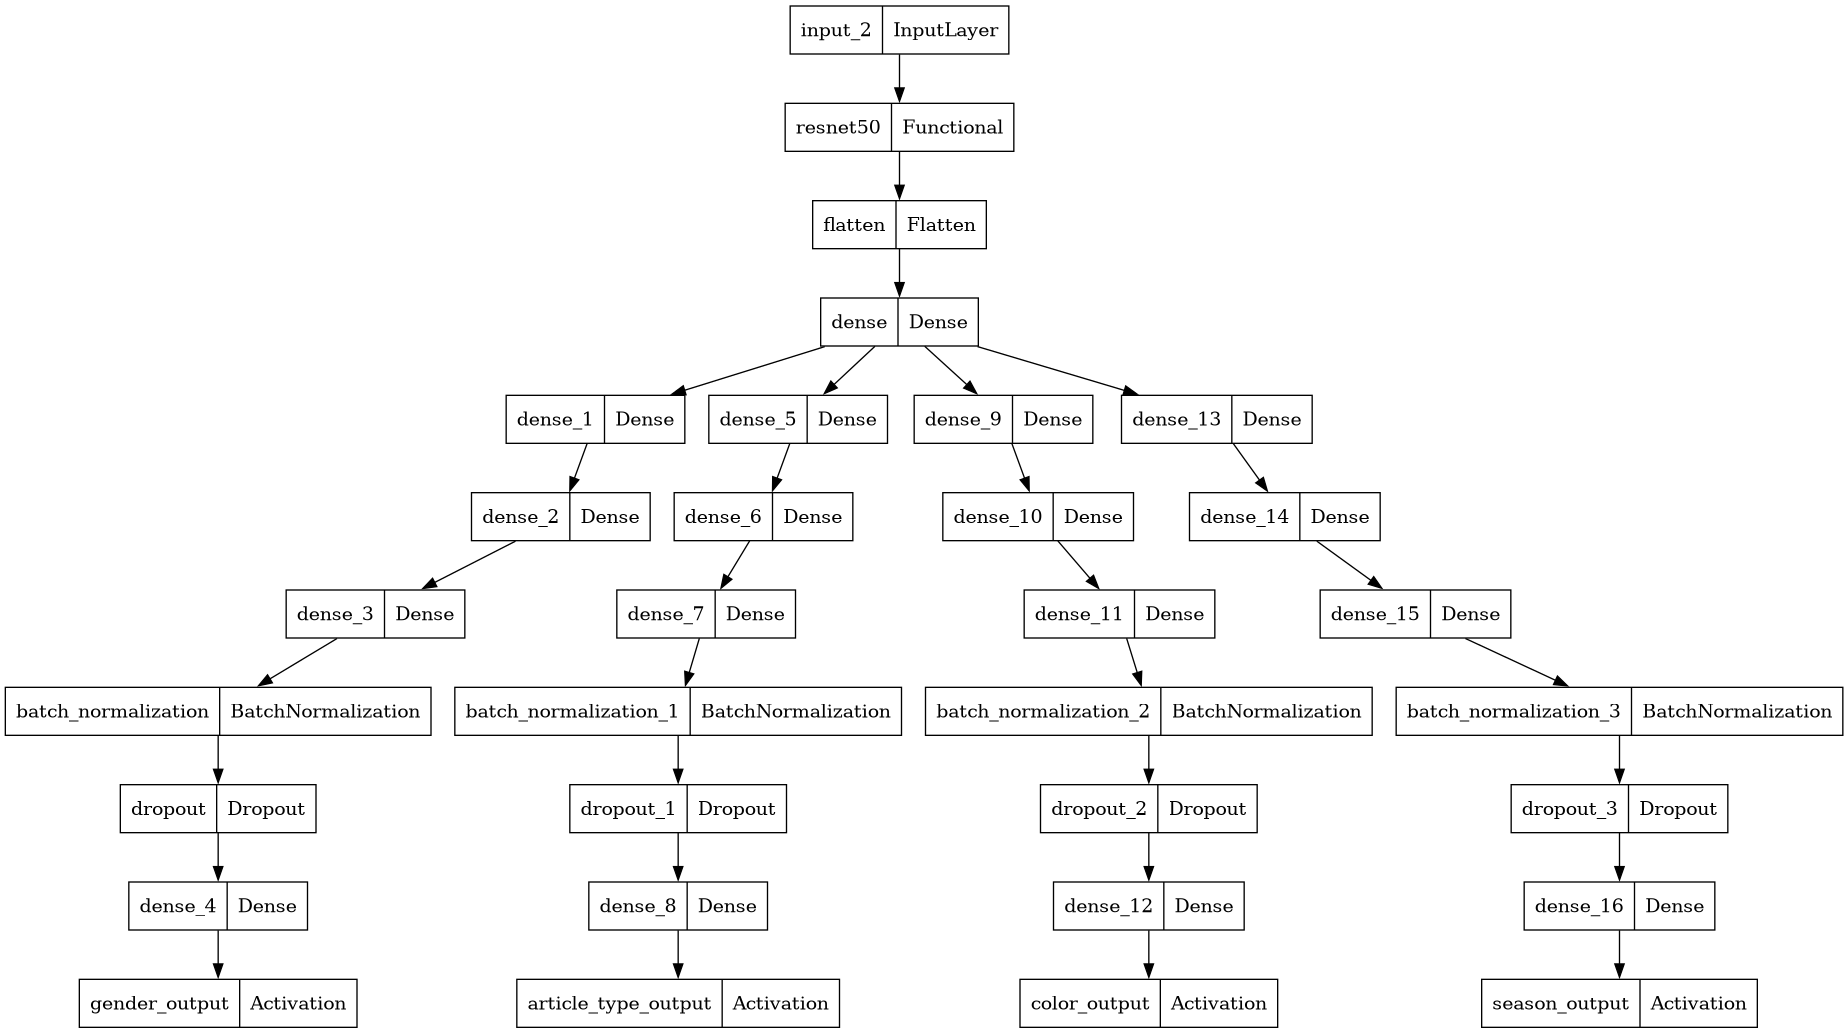

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model)

## Model Training

In [27]:
history = model.fit(
    X_train,
    {
        'gender_output': y_gender_train,
        'article_type_output': y_article_type_train,  
        'color_output': y_color_train,  
        'season_output': y_season_train,    
    },
    validation_data=(
        X_test,
        {
            'gender_output': y_gender_test, 
            'article_type_output': y_article_type_test,  
            'color_output': y_color_test,  
            'season_output': y_season_test,    
        }
    ),
    epochs=EPOCH,
    batch_size=BATCH,
    verbose=1
)

Epoch 1/25
1102/1102 [==============================] - 43s 29ms/step - loss: 4.7847 - gender_output_loss: 0.5621 - article_type_output_loss: 1.4380 - color_output_loss: 1.9021 - season_output_loss: 0.8824 - gender_output_accuracy: 0.7998 - article_type_output_accuracy: 0.6361 - color_output_accuracy: 0.4902 - season_output_accuracy: 0.6127 - val_loss: 4.2657 - val_gender_output_loss: 0.4643 - val_article_type_output_loss: 1.3161 - val_color_output_loss: 1.5931 - val_season_output_loss: 0.8923 - val_gender_output_accuracy: 0.8493 - val_article_type_output_accuracy: 0.6495 - val_color_output_accuracy: 0.5393 - val_season_output_accuracy: 0.6170
Epoch 2/25
1102/1102 [==============================] - 29s 26ms/step - loss: 3.4410 - gender_output_loss: 0.3839 - article_type_output_loss: 0.8439 - color_output_loss: 1.4579 - season_output_loss: 0.7554 - gender_output_accuracy: 0.8617 - article_type_output_accuracy: 0.7517 - color_output_accuracy: 0.5780 - season_output_accuracy: 0.6730 - val

## Saving the Model

In [28]:
model.save("classifier-model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model.save("classifier-model.keras")

## Plotting Accuracy and Loss graphs

<Axes: >

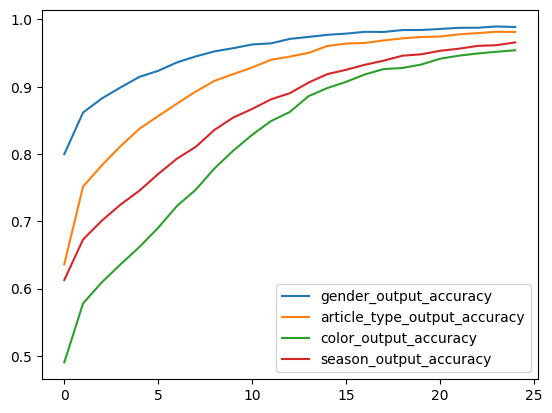

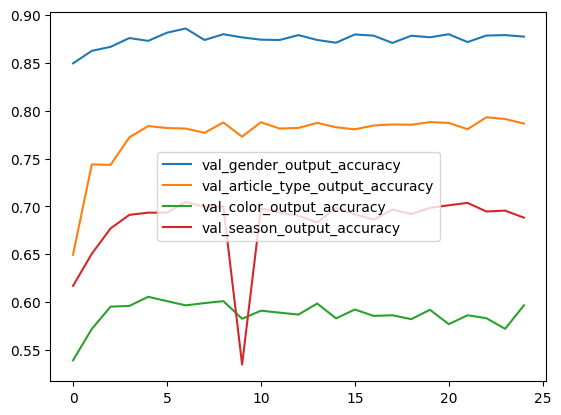

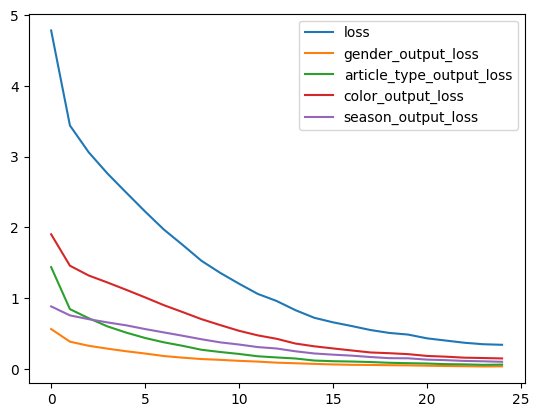

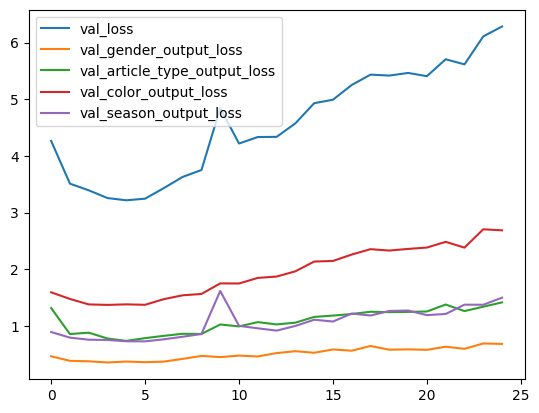

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'accuracy' in col and 'val' in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' not in col]].plot()
history_df.loc[:,[col for col in history_df.columns if 'loss' in col and 'val' in col]].plot()

1/1 [==============================] - 0s 23ms/step


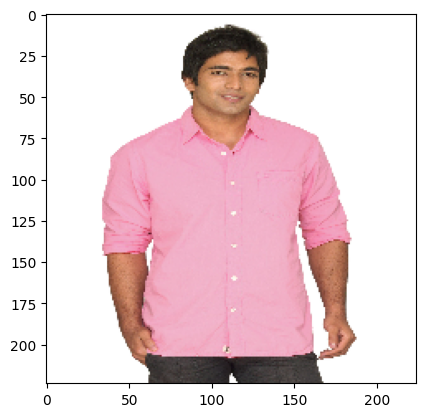

gender_label: Men
article_type_label: Tshirts
color_label: Pink
season_label: Fall


In [33]:
import matplotlib.pyplot as plt
image_path = data['filename'][12459]

input_image = np.expand_dims(preprocess_image(image_path), axis=0)

output = model.predict(input_image)


(gender_proba,
article_type_proba, color_proba,
season_proba) = output


gender_idx = gender_proba[0].argmax()
article_type_idx = article_type_proba[0].argmax()
color_idx = color_proba[0].argmax()
season_idx = season_proba[0].argmax()

gender_label = gender_lb.classes_[gender_idx]
article_type_label = article_type_lb.classes_[article_type_idx]
color_label = color_lb.classes_[color_idx]
season_label = season_lb.classes_[season_idx]

image = load_img(image_path, target_size=(224, 224))
plt.imshow(image)
plt.show()


print(f"gender_label: {gender_label}")
print(f"article_type_label: {article_type_label}")
print(f"color_label: {color_label}")
print(f"season_label: {season_label}")


## Making prediction on test images

In [59]:
img1 = "/kaggle/input/images/other/default/1/sample1.jpg"
img2 = "/kaggle/input/images/other/default/1/sample2.jpg"
img3 = "/kaggle/input/images/other/default/1/sample3.jpg"
img4 = "/kaggle/input/images/other/default/1/sample4.jpg"
img5 = "/kaggle/input/images/other/default/1/sample6.jpg"
img6 = "/kaggle/input/images2/other/default/1/sample7.jpg"
img7 = "/kaggle/input/images2/other/default/1/sample8.jpg"
img8 = "/kaggle/input/images2/other/default/1/sample9.jpg"

In [11]:
from tensorflow.keras.models import load_model

In [15]:
model = load_model('/kaggle/input/model1/keras/default/1/classifier-model.h5')

In [48]:
def predict(img1,model,gender_lb,article_type_lb,color_lb,season_lb):
    input_image = np.expand_dims(preprocess_image(img1), axis=0)

    output = model.predict(input_image)
    
    
    (gender_proba,
    article_type_proba, color_proba,
    season_proba) = output
    
    
    gender_idx = gender_proba[0].argmax()
    article_type_idx = article_type_proba[0].argmax()
    color_idx = color_proba[0].argmax()
    season_idx = season_proba[0].argmax()
    
    gender_label = gender_lb.classes_[gender_idx]
    article_type_label = article_type_lb.classes_[article_type_idx]
    color_label = color_lb.classes_[color_idx]
    season_label = season_lb.classes_[season_idx]
    
    image = load_img(img1, target_size=(224, 224))
    plt.imshow(image)
    plt.show()

    print(f"gender_label: {gender_label}")
    print(f"article_type_label: {article_type_label}")
    print(f"color_label: {color_label}")
    print(f"season_label: {season_label}")

### Sample 1

1/1 [==============================] - 0s 22ms/step


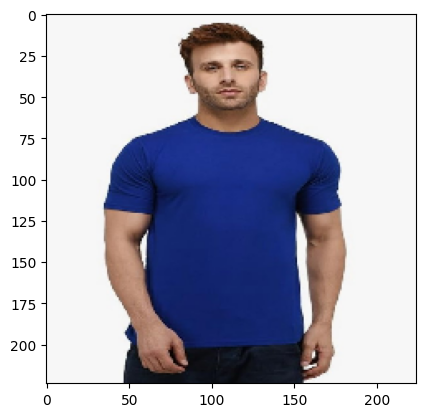

gender_label: Men
article_type_label: Tshirts
color_label: Blue
season_label: Fall


In [52]:
predict(img1,model,gender_lb,article_type_lb,color_lb,season_lb)

### Sample 2

1/1 [==============================] - 0s 22ms/step


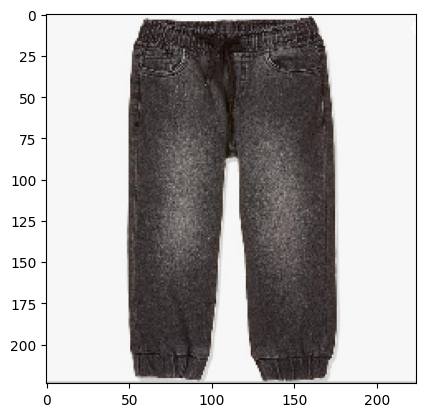

gender_label: Men
article_type_label: Track Pants
color_label: Grey
season_label: Summer


In [53]:
predict(img2,model,gender_lb,article_type_lb,color_lb,season_lb)

### Sample 3

1/1 [==============================] - 0s 23ms/step


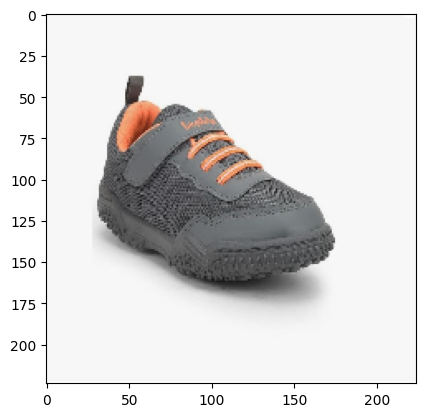

gender_label: Men
article_type_label: Casual Shoes
color_label: Grey
season_label: Summer


In [54]:
predict(img3,model,gender_lb,article_type_lb,color_lb,season_lb)

### Sample 4

1/1 [==============================] - 0s 25ms/step


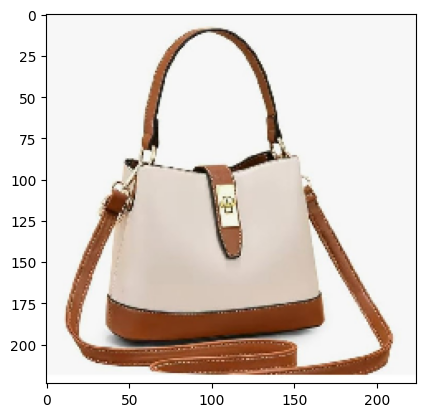

gender_label: Women
article_type_label: Handbags
color_label: Brown
season_label: Winter


In [60]:
predict(img6,model,gender_lb,article_type_lb,color_lb,season_lb)

### Sample 6

1/1 [==============================] - 0s 23ms/step


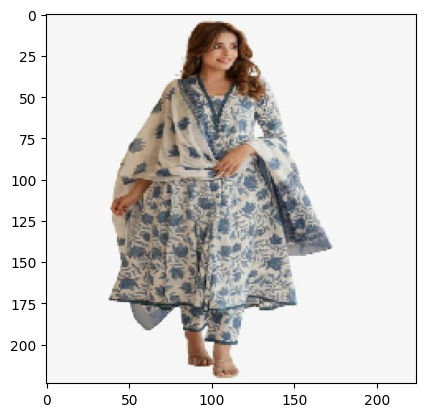

gender_label: Women
article_type_label: Dresses
color_label: Blue
season_label: Fall


In [61]:
predict(img7,model,gender_lb,article_type_lb,color_lb,season_lb)

### Sample 7

1/1 [==============================] - 0s 23ms/step


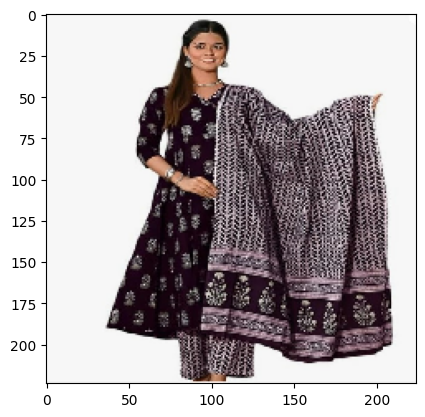

gender_label: Women
article_type_label: Dresses
color_label: Black
season_label: Summer


In [63]:
predict(img8,model,gender_lb,article_type_lb,color_lb,season_lb)